In [1]:
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# 그래프에 한글 폰트 사용하는 코드 -> 실행 후 [런타임]-[런타임 다시 시작] 메뉴를 이용하여 런타임 재시작!
!sudo apt-get install -y fonts-nanum # 나눔 소문자로
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [5]:
plt.rc('font', family='NanumBarunGothic')

# **문제1) 가장 무더웠던 날이 언제이며, 이날의 평균 기온, 평균 풍속, 최대 풍속을 구하시오.**

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
from google.colab import files
file_uploaded=files.upload()

Saving weather.csv to weather (1).csv


In [11]:
df = pd.read_csv("weather.csv", encoding = "CP949") #CP949(확장 완성형), MS
df

,일시,평균기온,최대풍속,평균풍속
0,2010-08-01,28.7,8.3,3.4
1,2010-08-02,25.2,8.7,3.8
2,2010-08-03,22.1,6.3,2.9
3,2010-08-04,25.3,6.6,4.2
4,2010-08-05,27.2,9.1,5.6
...,...,...,...,...
3648,2020-07-27,22.1,4.2,1.7
3649,2020-07-28,21.9,4.5,1.6
3650,2020-07-29,21.6,3.2,1.0
3651,2020-07-30,22.9,9.7,2.4


In [ ]:
df.shape # index : 0~3652 # colume : 일시 평균기온 최대풍속 평균풍속

In [12]:
df.head()

,일시,평균기온,최대풍속,평균풍속
0,2010-08-01,28.7,8.3,3.4
1,2010-08-02,25.2,8.7,3.8
2,2010-08-03,22.1,6.3,2.9
3,2010-08-04,25.3,6.6,4.2
4,2010-08-05,27.2,9.1,5.6


In [13]:
# 데이터프레임 통계, 문자 뺴고..
df.describe()
# std : 표준편차 # min 최솟값 # max 최대값

,평균기온,최대풍속,평균풍속
count,3653.000000,3649.000000,3647.000000
mean,12.942102,7.911099,3.936441
std,8.538507,3.029862,1.888473
min,-9.000000,2.000000,0.200000
25%,5.400000,5.700000,2.500000
50%,13.800000,7.600000,3.600000
75%,20.100000,9.700000,5.000000
max,31.300000,26.000000,14.900000


In [17]:
# 결측치 구하기 
df.isnull().sum() # 속성별로 결측치를 세어줌
#df['평균풍속']

일시      0
평균기온    0
최대풍속    4
평균풍속    6
dtype: int64

In [24]:
# 평균기온의 최소값 # 평균기온의 최소값은 -9.000000도 입니다.

a = df["평균기온"].min()
print(f"평균기온의 최소값은 {a}도 입니다.")

평균기온의 최소값은 -9.0도 입니다.


In [27]:
df["평균기온"].max()

31.3

In [32]:
# 31.3도인 날의 일시를 구하시오.
hot = df["평균기온"].max()
hotday = df["일시"][df["평균기온"] == hot]
hotday

1103    2013-08-08
Name: 일시, dtype: object

In [35]:
type(hotday)
hotday

1103    2013-08-08
Name: 일시, dtype: object

In [40]:
print(f"가장 더웠던 날은 {hotday[1103]}로 {hot}도 입니다.")

가장 더웠던 날은 2013-08-08로 31.3도 입니다.


In [42]:
  hottest = df.loc[df["평균기온"]==hot] # df.loc() :
  print("가장 무더웠던 날")
  print("=" * 50)
  hottest

가장 무더웠던 날


,일시,평균기온,최대풍속,평균풍속
1103,2013-08-08,31.3,7.8,4.6


# **문제2) 울릉도의 평균기온이 30도가 넘는 날을 찾아, 이날의 기상데이터를 나열해 보시오.**

In [50]:
hotlist = df.loc[df["평균기온"]>=30]
print("가장 30도가 넘는 날")
print("=" * 50)
hotlist

가장 30도가 넘는 날


,일시,평균기온,최대풍속,평균풍속
1103,2013-08-08,31.3,7.8,4.6
1104,2013-08-09,30.6,9.9,6.4
1105,2013-08-10,30.6,7.4,3.8
2913,2018-07-23,30.5,6.5,1.6
2925,2018-08-04,30.3,5.8,3.0


# **문제3) 울릉도는 몇 월에 바람이 가장 강할까? (막대그래프 출력)**

In [66]:
# 슬라이싱을 이용하여 월을 잘라내어, 기존 데이터프레임에 컬럼을 추가시켜도 됩니다.
# 월별로 데이터를 다시 분류하기 위해 '월' 속성을 부여
df["일시"].str[5:7] # 월
df["일시"].str[8:] # 일

df["월"] = df["일시"].str[5:7]

In [71]:
# 월별로 묶어봅시다. groupby()
df_group = df.groupby('월')['평균풍속'].mean()
df_group

월
01    -9.0
02    -7.2
03    -2.7
04     2.5
05     7.1
06    13.4
07    16.3
08    17.1
09    14.6
10     4.1
11    -0.3
12    -5.4
Name: 평균기온, dtype: float64

In [74]:
#월별로 가장 추웠던 날
df_group2 = df.groupby('월')['평균기온'].min()
df_group2

월
01    -9.0
02    -7.2
03    -2.7
04     2.5
05     7.1
06    13.4
07    16.3
08    17.1
09    14.6
10     4.1
11    -0.3
12    -5.4
Name: 평균기온, dtype: float64

In [75]:
# 문제3) 울릉도는 몇 월에 바람이 가장 강할까?
df_group.max()

4.62248322147651

In [80]:
# df_group[df_group == df_group.max()]
df_group.index[df_group == df_group.max()] # index 추출
re = df_group.index[df_group == df_group.max()].tolist() # Index(['04'], dtype='object', name='월')

print(f'울릉도는 {re[0]}월에 가장 바람이 강합니다.')

울릉도는 04월에 가장 바람이 강합니다.


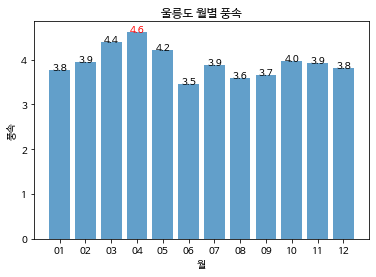

In [106]:
from pyparsing.helpers import alphas
# x : 월
# y : 평균풍속
# 막대그래프 출력, 자료구조 변환 -> 리스트

wind = df_group

x = wind.index.tolist() # 인덱스, 월
y = wind.tolist() # 풍속

plt.bar(x, y, alpha = 0.7)

plt.title('울릉도 월별 풍속')
plt.xlabel('월')
plt.ylabel('풍속')
for i in range(len(x)):
  if y[i] == max(y):
    plt.text(i, y[i], round(y[i], 1), ha = 'center', color = 'r')
  else:
    plt.text(i, y[i], round(y[i], 1), ha = 'center')
plt.show()